The Global Landslide Catalog (GLC) was developed with the goal of identifying rainfall-triggered landslide events around the world, regardless of size, impacts or location. The GLC considers all types of mass movements triggered by rainfall, which have been reported in the media, disaster databases, scientific reports, or other sources. The GLC has been compiled since 2007 at NASA Goddard Space Flight Center.

<h3>Univariate Analysis</h3>
<hr>

11033
22


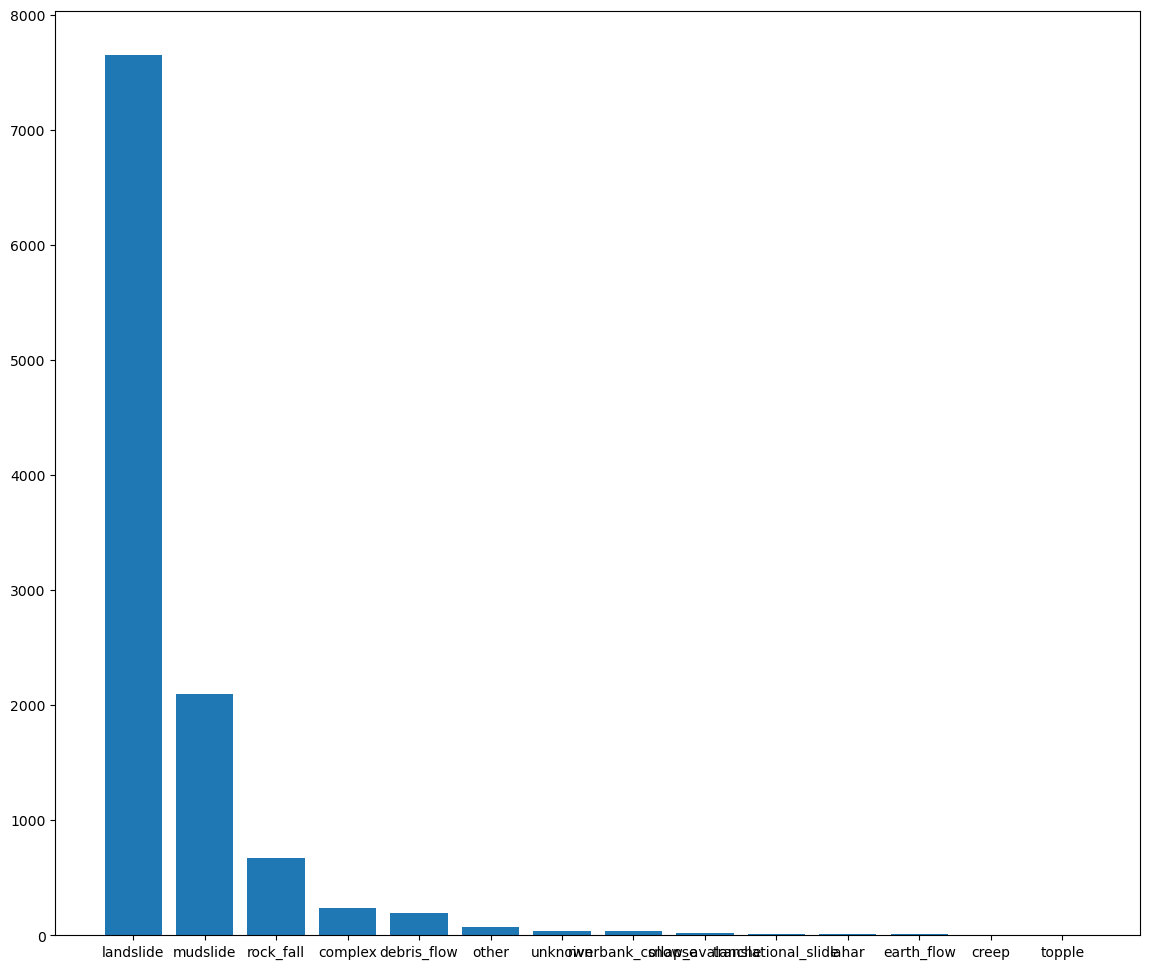

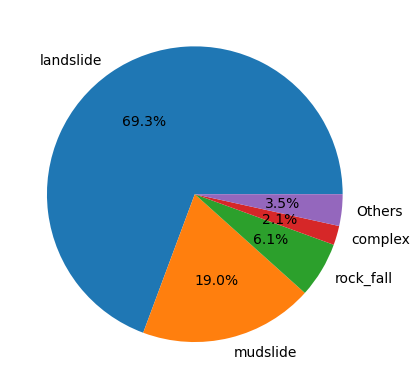

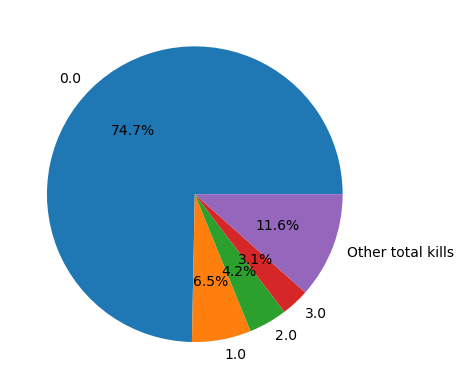

landslide_category
landslide              7648
mudslide               2100
rock_fall               671
complex                 232
debris_flow             194
other                    68
unknown                  38
riverbank_collapse       37
snow_avalanche           15
translational_slide       9
lahar                     7
earth_flow                7
creep                     5
topple                    1
Name: count, dtype: int64
fatality_count
0.0       7206
1.0        624
2.0        405
3.0        297
4.0        191
          ... 
430.0        1
491.0        1
1765.0       1
2100.0       1
5000.0       1
Name: count, Length: 105, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Global_Landslide_Catalog_Export_20241110.csv")


df.drop("event_time", axis=1, inplace=True)
df.drop("submitted_date", axis=1, inplace=True)
df.drop("created_date", axis=1, inplace=True)
df.drop("last_edited_date", axis=1, inplace=True)
df.drop("longitude", axis=1, inplace=True)
df.drop("latitude", axis=1, inplace=True)
df.drop("photo_link", axis=1, inplace=True)
df.drop("landslide_setting", axis=1, inplace=True)
df.drop("event_import_source", axis=1, inplace=True)


df.shape
numRows, numCols = df.shape
print(numRows)
print(numCols)

for col in df.columns:
    numNan = df[col].isna().sum()
    nanPerC = (numNan/len(df))*100.0
    #print(col, nanPerC)
   
    if nanPerC >= 30:
        df.drop(col, axis=1, inplace=True)
  
for row in range(numRows):
    numNan = df.iloc[row].isna().sum()
    nanPerR = (numNan/numCols)*100.0
    #print(row, nanPerR)
    
    if nanPerR >= 30:
        df.drop(row, axis=0)
        
        #print("Row:", row, "has been dropped")
  

plt.figure(figsize=(14,12))
landslideCount = df["landslide_category"].value_counts()
landslideSum = landslideCount.sum()
smallCategoryL = landslideCount[(landslideCount/landslideSum)*100 < 1.8]

fatalityCount= df["fatality_count"].value_counts().sort_index()
fatalitySum = fatalityCount.sum()
smallCategoryF = fatalityCount[(fatalityCount/fatalitySum) * 100 < 2]


plt.bar(landslideCount.index, landslideCount)
plt.show()



#landslideCount = landslideCount.groupby(landslideCount.index.map(lambda x: x if landslideCount[x] >= .2 else "Other landslide")).sum()
landslideBinned = landslideCount.drop(smallCategoryL.index)
landslideBinned["Others"] = smallCategoryL.sum()
plt.pie(landslideBinned, labels=landslideBinned.index, autopct='%1.1f%%')
plt.show()

fatalityBinned = fatalityCount.drop(smallCategoryF.index)
fatalityBinned["Other total kills"] = smallCategoryF.sum()
plt.pie(fatalityBinned, labels = fatalityBinned.index, autopct='%1.1f%%')
plt.show()

print(landslideCount)
print(fatalityCount)

numeric_columns = ['fatality_count', 'gazeteer_distance', 'location_accuracy']
categorical_columns =['landslide_category', 'landslide_trigger', 'landslide_size']

# Numeric columns subplot
rows = (len(numeric_columns) + 2) // 3  # Calculate required rows
fig, axes = plt.subplots(rows, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Categorical columns subplot
fig, axes = plt.subplots(nrows=len(categorical_columns)//3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    if i < len(axes):
        sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes[i])
        axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Histograms for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

#Bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts()
    plt.bar(value_counts.index, value_counts.values, alpha=0.7)
    plt.title(col, fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3)
    plt.show()

# Boxplots for numeric columns 
for col in numeric_columns:
    if col in df.columns:
        # Ensure the column is numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Skip empty or non-numeric columns
        if df[col].dropna().empty:
            print(f"Skipping column '{col}' as it contains no valid numeric data.")
            continue
        
        # Plot boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
        plt.title(f'Boxplot of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()


# Calculate skewness and kurtosis for numeric columns
from scipy.stats import skew, kurtosis

normality_stats = []
for col in numeric_columns:
    col_skew = skew(df[col].dropna())
    col_kurt = kurtosis(df[col].dropna())
    normality_stats.append({
        "Column": col,
        "Skewness": col_skew,
        "Kurtosis": col_kurt,
        "Is Normal": abs(col_skew) < 0.5 and abs(col_kurt) < 3
    })


# Convert the results into a DataFrame 
normality_df = pd.DataFrame(normality_stats)


# fldataframe = df.groupby(df["landslide_category"], df["fatality_count"])
# print(fldataframe)


# plt.scatter()
# plt.xlabel()
# plt.show()

#time series analysis
df["event_date"] = pd.to_datetime(df["event_date"])
times = pd.Series(df["event_date"])
print("Series: ", times)
df = df.set_index(df["event_date"])
print(times.sort_values())
df.head()

newLandslideCount = df.groupby("landslide_category").resample("Y").size().unstack(level=0)
print("landslides:", newLandslideCount)
print(newLandslideCount.columns)
#timeframe = df["event_date"].iloc['1988-11-07':'1996-12-26']

#Try to find seasonality to find landslide type. Maybe more landslides happen in a certain time frame
plt.figure(figsize=(12,8))
# plt.plot(df[landslideCount == "landslide"], label="landslide")
# plt.xlabel("time")
# plt.ylabel("landslide")

# ax1 = plt.subplot(3,1,1)
# ax2 = plt.subplot(3,1,2,sharex=ax1)
# ax3 = plt.subplot(3,1,3, sharex=ax1)

# ax1.plot(times, "b")
# ax1.set_ylabel("landslide count")
# ax1.set_title("time comparison")

for column in newLandslideCount.columns:
    plt.plot(newLandslideCount.index, newLandslideCount[column], label=column)

plt.xlabel("time")
plt.ylabel("count")
plt.legend(title="landslide type")
plt.show()

df.reset_index(drop=True, inplace=True)
#df.drop_duplicates(inplace=True)
sns.set(style="ticks")
sns.pairplot(df, vars= ["gazeteer_distance", "event_date"], hue="fatality_count")
plt.show()

<h3>Bi-variate Analysis</h3>
<hr>

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

pcorr = df.corr(numeric_only=True)
pcorr

scorr = df.corr(method="spearman", numeric_only=True)
scorr

kcorr = df.corr(method="kendall", numeric_only=True)
kcorr

sns.heatmap(pcorr, xticklabels=pcorr.columns, yticklabels=pcorr.columns, cmap="YlGnBu", annot=True, cbar=True)
plt.show()

sns.heatmap(scorr, xticklabels=scorr.columns, yticklabels=scorr.columns, cmap="YlGnBu", annot=True, cbar=True)
plt.show()

sns.heatmap(kcorr, xticklabels=kcorr.columns, yticklabels=kcorr.columns, cmap="YlGnBu", annot=True, cbar=True)
plt.show()

crossTab = pd.crosstab(df.landslide_category, df.country_code)
print(crossTab)

pivot = df.pivot_table(index="country_code", columns="landslide_category", aggfunc={"landslide_category":len}, fill_value=0)
print(pivot)

<h3>Multivariate Analysis</h3>
<hr>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
le = LabelEncoder()

# Select relevant features (numeric + categorical)
numeric_features = ['fatality_count', 'gazeteer_distance', 'location_accuracy']
categorical_features = ['landslide_category', 'landslide_trigger', 'landslide_size']
# Remove columns with all missing values
numeric_features = [col for col in numeric_features if df[col].notna().sum() > 0]

# Handle missing values with median strategy
imputer = SimpleImputer(strategy='median')
df_numeric = pd.DataFrame(imputer.fit_transform(df[numeric_features]), columns=numeric_features)

# Encode categorical features for K-modes
df_categorical = df[categorical_features].apply(LabelEncoder().fit_transform)

# Standardize numeric data for K-means and hierarchical clustering
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_features)

# Combine numeric and categorical 
df_combined = pd.concat([df_scaled, df_categorical], axis=1)

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn import cluster

# List of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Function to plot dendrogram for each linkage method
def plot_dendrograms(data, methods):
    for method in methods:
        # Compute linkage matrix
        linkage_matrix = linkage(data, method=method)
        
        # Plot dendrogram
        plt.figure(figsize=(10, 7))
        dendrogram(
            linkage_matrix,
            truncate_mode='lastp',  # Show only the last p clusters
            p=30,                  # Number of clusters to display
            leaf_rotation=90.,     # Rotate labels for better readability
            leaf_font_size=10.,    # Font size for leaf labels
            color_threshold=0.7 * max(linkage_matrix[:, 2])  # Color clusters
        )
        plt.title(f"Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)")
        plt.xlabel("Cluster Index or Data Point ID")
        plt.ylabel("Distance (Linkage)")
        plt.show()

# Assuming df_scaled contains preprocessed numeric data
plot_dendrograms(df_scaled, linkage_methods)



from sklearn.cluster import KMeans
# Find optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):
    kmean = KMeans(n_clusters=k, random_state=42)
    kmean.fit(df_scaled)
    sse.append(kmean.inertia_)

kmean.cluster_centers_
kmean.inertia_
kmean.n_iter_
kmean.labels_
df['clusterNum'] = kmean.labels_
df.head()
centroids = kmean.cluster_centers_


# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-means with optimal k
optimal_k = 3  # Choose based on the elbow method
kmean = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['kmeans_cluster'] = kmean.fit_predict(df_scaled)
grouped_scaled = df_scaled.groupby('kmeans_cluster').mean()
print("Grouped Scaled Data:")
print(grouped_scaled)
centroids = kmean.cluster_centers_
print("Cluster Centers:")
print(centroids)

from kmodes.kmodes import KModes
costs = []
for k in range(1, 11):
    kmodes = KModes(n_clusters=k, init='Cao', n_init=5, random_state=42)
    kmodes.fit(df_categorical)
    costs.append(kmodes.cost_)

# Plot the cost curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k (K-Modes)')
plt.show()

# Choose the optimal number of clusters
optimal_k_modes = 3
kmodes = KModes(n_clusters=optimal_k_modes, init='Cao', n_init=5, random_state=42)
df_categorical['kmodes_cluster'] = kmodes.fit_predict(df_categorical)
grouped_categorical = df_categorical.groupby('kmodes_cluster').size()
print('Grouped categorical')
print(grouped_categorical)
print("Cluster centroids for K-Modes:")
print(kmodes.cluster_centroids_)

# plt.figure(figsize=(10, 6))
# plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], cmap='Accent', s=50)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
# plt.title('K-Means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.scatter(df_categorical.iloc[:, 0], df_categorical.iloc[:, 1], cmap='Accent', s=50)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
# plt.title('K-Modes Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# Visualize k-means clusters (replace Feature1 and Feature2 with actual column names)
sns.scatterplot(data=df_scaled, x='fatality_count', y='gazeteer_distance', hue='kmeans_cluster', palette='viridis')
sns.scatterplot(centroids[:, 0], c='red')
plt.title('K-Means Clustering')
plt.show()

# Visualize k-modes clusters
sns.scatterplot(data=df_categorical, x='landslide_trigger', y='landslide_category', hue='kmodes_cluster', palette='viridis')
sns.scatterplot(centroids[:, 0], c='red')
plt.title('K-Modes Cluster Count')
plt.show()

cluster_sizes = df['kmodes_cluster'].value_counts()
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('K-Modes Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.show()



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#model = LinearRegression(fit_intercept=True)
le = LabelEncoder()
df["landslide_category"] = le.fit_transform(df["landslide_category"])
df["landslide_size"] = le.fit_transform(df["landslide_size"])
df["country_code"] = le.fit_transform(df["country_code"])
# x=newLandslideCount.sample(n=50)
# y=fatalityCount.sample(50).tolist()
#model.fit(x, y)
#xfit = np.linspace(newLandslideCount)
#yfit = model.predict(xfit[:, fatalityCount])

#plt.figure(figsize=(12,8))
#plt.scatter(x,y)

#plt.plot(xfit, yfit)
#plt.show()

# print(df.columns)
# sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
# plt.show()

#plt.scatter(df["landslide_category"], df["fatality_count"])
#plt.show()

#sns.heatmap(df["fatality_count"], df[])

# country = df["country_code"]
# Y = df["landslide_category"]
# X= df.drop(['country_code', 'landslide_category'], axis=1)
# print(df.columns)


print('LINEAR REGRESSION')
df["admin_division_population"] = df["admin_division_population"].fillna(0)
df["gazeteer_distance"] = df["gazeteer_distance"].fillna(0)
df["fatality_count"] = df["fatality_count"].fillna(0)
X = df[['admin_division_population', 'gazeteer_distance', "landslide_category", "country_code", "landslide_size"]]
Y = df["fatality_count"]
model = LinearRegression(fit_intercept=True)
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)

model.fit(XTrain, YTrain)
YPrediction = model.predict(XTest)
MSE = mean_squared_error(YTest, YPrediction)
R2 = r2_score(YTest, YPrediction)
print(XTest, XTrain, YTest, YTrain)
print("Score: ", model.score(XTest, YTest))
print("MSE: ", MSE)
print("R^2: ", R2)


<h3>Cited sources from database</h3> 
Kirschbaum, D. B., Adler, R., Hong, Y., Hill, S., & Lerner-Lam, A. (2010). A global landslide catalog for hazard applications: method, results, and limitations. Natural Hazards, 52(3), 561–575. doi:10.1007/s11069-009-9401-4. [1]
Kirschbaum, D.B., T. Stanley, Y. Zhou (In press, 2015). Spatial and Temporal Analysis of a Global Landslide Catalog. Geomorphology. doi:10.1016/j.geomorph.2015.03.016. [2]
<hr>